In [152]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from statistics import *
from kneed import KneeLocator

In [49]:
df = pd.read_csv('../data/cleaned_data_source.csv')
df.head()

,MSISDN/Number,Bearer Id,Total UL/DL,Total HTTP,Total Youtube,Total Netflix,Total Gaming,Total Google,Total Email,Total Social Media,Total Other,Dur. (ms)
0,3.360100e+10,1,878.690574,117.713325,21.624548,27.180981,812.458661,4.389005,1.0,2.232135,386.570872,116720.0
1,3.360100e+10,1,156.859643,117.713325,12.432223,11.221763,119.750078,5.334863,3.0,2.660565,281.710071,181230.0
2,3.360100e+10,1,595.966483,117.713325,21.333570,19.353900,538.827713,3.443126,3.0,3.195623,501.693672,134969.0
3,3.360101e+10,1,422.320698,0.009402,6.977321,1.942092,391.126127,9.678493,2.0,0.280294,35.279702,49878.0
4,3.360101e+10,2,1457.410944,307.655241,41.533002,49.201724,1314.797820,18.499616,3.0,2.912542,804.804484,37104.0


In [50]:
df['Session Frequency'] = df.groupby('MSISDN/Number')['Bearer Id'].transform('sum')
df.head()

,MSISDN/Number,Bearer Id,Total UL/DL,Total HTTP,Total Youtube,Total Netflix,Total Gaming,Total Google,Total Email,Total Social Media,Total Other,Dur. (ms),Session Frequency
0,3.360100e+10,1,878.690574,117.713325,21.624548,27.180981,812.458661,4.389005,1.0,2.232135,386.570872,116720.0,1
1,3.360100e+10,1,156.859643,117.713325,12.432223,11.221763,119.750078,5.334863,3.0,2.660565,281.710071,181230.0,1
2,3.360100e+10,1,595.966483,117.713325,21.333570,19.353900,538.827713,3.443126,3.0,3.195623,501.693672,134969.0,1
3,3.360101e+10,1,422.320698,0.009402,6.977321,1.942092,391.126127,9.678493,2.0,0.280294,35.279702,49878.0,1
4,3.360101e+10,2,1457.410944,307.655241,41.533002,49.201724,1314.797820,18.499616,3.0,2.912542,804.804484,37104.0,2


In [51]:
df_session = df[['MSISDN/Number', 'Total UL/DL', 'Dur. (ms)', 'Session Frequency']]

In [52]:
df_session.head()

,MSISDN/Number,Total UL/DL,Dur. (ms),Session Frequency
0,3.360100e+10,878.690574,116720.0,1
1,3.360100e+10,156.859643,181230.0,1
2,3.360100e+10,595.966483,134969.0,1
3,3.360101e+10,422.320698,49878.0,1
4,3.360101e+10,1457.410944,37104.0,2


In [53]:
df_session.sort_values(by='Session Frequency')
df_session.head(10)

,MSISDN/Number,Total UL/DL,Dur. (ms),Session Frequency
0,3.360100e+10,878.690574,116720.0,1
1,3.360100e+10,156.859643,181230.0,1
2,3.360100e+10,595.966483,134969.0,1
3,3.360101e+10,422.320698,49878.0,1
4,3.360101e+10,1457.410944,37104.0,2
5,3.360101e+10,615.217221,253983.0,2
6,3.360101e+10,654.723066,128360.0,2
7,3.360101e+10,332.660357,86399.0,1
8,3.360101e+10,990.132189,495702.0,2
9,3.360102e+10,732.463761,124854.0,1


Aggregate sessions frequency, the duration of the session, the sessions total traffic (download and upload (bytes)) per customer id (MSISDN) and report the top 10 customers per engagement metric.

In [54]:
df_session.describe()

,MSISDN/Number,Total UL/DL,Dur. (ms),Session Frequency
count,1.064720e+05,106472.000000,1.064720e+05,106472.000000
mean,4.515608e+10,693.899454,1.469026e+05,1.399523
std,2.894629e+12,918.963548,2.155861e+05,1.738908
min,3.360100e+10,33.249009,7.142000e+03,1.000000
25%,3.365088e+10,358.770974,7.240025e+04,1.000000
50%,3.366365e+10,618.332719,1.031375e+05,1.000000
75%,3.368345e+10,857.880507,1.727990e+05,2.000000
max,8.823970e+14,254052.402468,3.539920e+07,504.000000


Top 10 Customers Per Metrics

1. Session Duration

In [55]:
df_session.sort_values(by='Dur. (ms)',ascending=False, inplace=True, ignore_index=True)
df_session[['MSISDN/Number', 'Dur. (ms)']].head(10)

/var/folders/fl/qp10w1_15hzgsf70g4yg6f6h0000gn/T/ipykernel_9871/513661254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_session.sort_values(by='Dur. (ms)',ascending=False, inplace=True, ignore_index=True)


,MSISDN/Number,Dur. (ms)
0,4.188282e+10,35399200.0
1,3.362578e+10,18553754.0
2,3.361489e+10,9966898.0
3,3.376054e+10,9279434.0
4,3.362632e+10,8791927.0
5,3.366716e+10,8744914.0
6,3.366284e+10,6614270.0
7,3.366469e+10,6288730.0
8,3.360313e+10,6287761.0
9,3.366746e+10,5649882.0


2. Session Frequency

In [56]:
df_session.sort_values(by='Session Frequency', ascending=False, inplace=True, ignore_index=True)
df_session[['MSISDN/Number', 'Session Frequency']].head(10)

/var/folders/fl/qp10w1_15hzgsf70g4yg6f6h0000gn/T/ipykernel_9871/4294874432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_session.sort_values(by='Session Frequency', ascending=False, inplace=True, ignore_index=True)


,MSISDN/Number,Session Frequency
0,4.188282e+10,504
1,3.362632e+10,18
2,3.362578e+10,17
3,3.361489e+10,17
4,3.365973e+10,16
5,3.367588e+10,15
6,3.376054e+10,15
7,3.366716e+10,13
8,3.360313e+10,12
9,3.378632e+10,12


3. Total Traffic

In [57]:
df_session.sort_values(by='Total UL/DL', ascending=False, inplace=True, ignore_index=True)
df_session[['MSISDN/Number', 'Total UL/DL']].head(10)

/var/folders/fl/qp10w1_15hzgsf70g4yg6f6h0000gn/T/ipykernel_9871/2214828214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_session.sort_values(by='Total UL/DL', ascending=False, inplace=True, ignore_index=True)


,MSISDN/Number,Total UL/DL
0,4.188282e+10,254052.402468
1,3.361489e+10,8846.226494
2,3.376054e+10,8514.773963
3,3.362578e+10,8499.620722
4,3.362632e+10,7971.167261
5,3.367588e+10,7891.110608
6,3.365973e+10,7705.862783
7,3.366646e+10,7308.500938
8,3.376041e+10,7132.370514
9,3.366471e+10,6872.018208


Normalizing Each Metrics

1. Session Duration

In [69]:
dur = pd.DataFrame(df_session['Dur. (ms)'])
normalize_freq = dur.values
normalizer = MinMaxScaler()
normalized_dur = normalizer.fit_transform(normalize_freq)
df_session['Dur. (ms)'] = normalized_dur


/var/folders/fl/qp10w1_15hzgsf70g4yg6f6h0000gn/T/ipykernel_9871/3750209833.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_session['Dur. (ms)'] = normalized_dur


2. Session Frequency

In [68]:
freq = pd.DataFrame(df_session['Session Frequency'])
normalize_freq = freq.values
normalizer = MinMaxScaler()
normalized_freq = normalizer.fit_transform(normalize_freq)
df_session['Session Frequency'] = normalized_freq

/var/folders/fl/qp10w1_15hzgsf70g4yg6f6h0000gn/T/ipykernel_9871/310948229.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_session['Session Frequency'] = normalized_freq


3. Total Traffic

In [72]:
total_traffic = pd.DataFrame(df_session['Total UL/DL'])
normalize_traffic = total_traffic.values
normalizer = MinMaxScaler()
normalized_traffic = normalizer.fit_transform(normalize_traffic)
df_session['Total UL/DL'] = normalized_traffic


/var/folders/fl/qp10w1_15hzgsf70g4yg6f6h0000gn/T/ipykernel_9871/1311529651.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_session['Total UL/DL'] = normalized_traffic


In [73]:
df_session.describe()

,MSISDN/Number,Total UL/DL,Dur. (ms),Session Frequency
count,1.064720e+05,106472.000000,106472.000000,106472.000000
mean,4.515608e+10,0.002601,0.003949,0.000794
std,2.894629e+12,0.003618,0.006091,0.003457
min,3.360100e+10,0.000000,0.000000,0.000000
25%,3.365088e+10,0.001281,0.001844,0.000000
50%,3.366365e+10,0.002303,0.002712,0.000000
75%,3.368345e+10,0.003246,0.004681,0.001988
max,8.823970e+14,1.000000,1.000000,1.000000


K-mean to Classify Customers in Three Groups of Engagement

In [80]:
df_for_kmeans = df_session[['Total UL/DL', 'Dur. (ms)', 'Session Frequency']]
df_for_kmeans.head()

,Total UL/DL,Dur. (ms),Session Frequency
0,1.000000,1.000000,1.000000
1,0.034694,0.281412,0.031809
2,0.033389,0.261988,0.027833
3,0.033330,0.524033,0.031809
4,0.031249,0.248213,0.033797


In [82]:
kmeans = KMeans(n_clusters = 3, init='k-means++')
kmeans.fit(df_for_kmeans)
cluster = kmeans.predict(df_for_kmeans)
df_with_cluster = pd.DataFrame(df_for_kmeans)
df_with_cluster['cluster'] = cluster
df_with_cluster

,Total UL/DL,Dur. (ms),Session Frequency,cluster
0,1.000000,1.000000,1.000000,2
1,0.034694,0.281412,0.031809,1
2,0.033389,0.261988,0.027833,1
3,0.033330,0.524033,0.031809,1
4,0.031249,0.248213,0.033797,1
...,...,...,...,...
106467,0.000019,0.000882,0.000000,0
106468,0.000018,0.002700,0.000000,0
106469,0.000003,0.005176,0.000000,0
106470,0.000001,0.004494,0.000000,0


Finding the centroid to get the center of the clusters

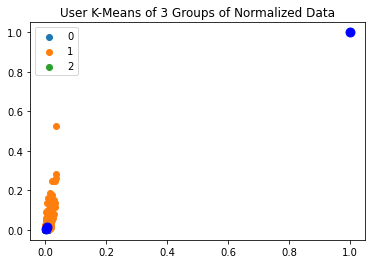

In [99]:
plt.title('User K-Means of 3 Groups of Normalized Data')
centroids = kmeans.cluster_centers_
unique_cluster = np.unique(df_with_cluster['cluster'])
centroids = kmeans.cluster_centers_
plt.scatter(df_for_kmeans[cluster == 0].iloc[:,0] , df_for_kmeans[cluster == 0].iloc[:,1], label = 0)
plt.scatter(df_for_kmeans[cluster == 1].iloc[:,0] , df_for_kmeans[cluster == 1].iloc[:,1], label = 1)
plt.scatter(df_for_kmeans[cluster == 2].iloc[:,0] , df_for_kmeans[cluster == 2].iloc[:,1], label = 2)

plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'blue')
plt.legend()
plt.show()

Minimum, Maximum, Average & Total Non-normalized Metrics 

Cluster 1

In [107]:
df_cluster1 = df_with_cluster.loc[df_with_cluster['cluster'] == 0]
df_cluster1.describe()

,Total UL/DL,Dur. (ms),Session Frequency,cluster
count,98790.000000,98790.000000,98790.000000,98790.0
mean,0.002297,0.003072,0.000494,0.0
std,0.001418,0.002047,0.000979,0.0
min,0.000000,0.000000,0.000000,0.0
25%,0.001208,0.001618,0.000000,0.0
50%,0.002182,0.002512,0.000000,0.0
75%,0.003083,0.004394,0.000000,0.0
max,0.012750,0.011241,0.009940,0.0


Cluster 2

In [108]:
df_cluster1 = df_with_cluster.loc[df_with_cluster['cluster'] == 1]
df_cluster1.describe()

,Total UL/DL,Dur. (ms),Session Frequency,cluster
count,7681.000000,7681.000000,7681.000000,7681.0
mean,0.006376,0.015102,0.004523,1.0
std,0.003256,0.014037,0.002878,0.0
min,0.000094,0.004621,0.000000,1.0
25%,0.004087,0.009775,0.001988,1.0
50%,0.006033,0.011909,0.003976,1.0
75%,0.008249,0.014852,0.005964,1.0
max,0.034694,0.524033,0.033797,1.0


Cluster 3

In [109]:
df_cluster1 = df_with_cluster.loc[df_with_cluster['cluster'] == 2]
df_cluster1.describe()

,Total UL/DL,Dur. (ms),Session Frequency,cluster
count,1.0,1.0,1.0,1.0
mean,1.0,1.0,1.0,2.0
std,NaN,NaN,NaN,NaN
min,1.0,1.0,1.0,2.0
25%,1.0,1.0,1.0,2.0
50%,1.0,1.0,1.0,2.0
75%,1.0,1.0,1.0,2.0
max,1.0,1.0,1.0,2.0


Total Non-normalized Metrics

In [114]:
df_unnormalized = df
df_unnormalized['Session Frequency'] = df_unnormalized.groupby('MSISDN/Number')['Bearer Id'].transform('sum')
df_unnormalized = df[['Total UL/DL', 'Dur. (ms)', 'Session Frequency']]
df_unnormalized.head()

,Total UL/DL,Dur. (ms),Session Frequency
0,0.003328,116720.0,1
1,0.000487,181230.0,1
2,0.002215,134969.0,1
3,0.001532,49878.0,1
4,0.005607,37104.0,2


In [117]:
kmeans = KMeans(n_clusters = 3, init='k-means++')
kmeans.fit(df_unnormalized)
cluster = kmeans.predict(df_unnormalized)
df_unnormalized_with_cluster = pd.DataFrame(df_unnormalized)
df_unnormalized_with_cluster['cluster'] = cluster
df_unnormalized_with_cluster.head()

,Total UL/DL,Dur. (ms),Session Frequency,cluster
0,0.003328,116720.0,1,0
1,0.000487,181230.0,1,0
2,0.002215,134969.0,1,0
3,0.001532,49878.0,1,0
4,0.005607,37104.0,2,0


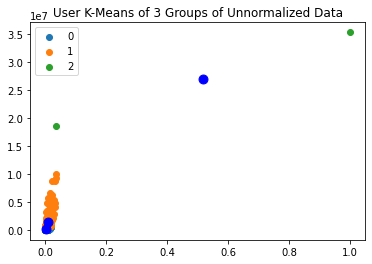

In [118]:

plt.title('User K-Means of 3 Groups of Unnormalized Data')
centroids = kmeans.cluster_centers_
unique_cluster = np.unique(df_with_cluster['cluster'])
centroids = kmeans.cluster_centers_
plt.scatter(df_unnormalized_with_cluster[cluster == 0].iloc[:,0] , df_unnormalized_with_cluster[cluster == 0].iloc[:,1], label = 0)
plt.scatter(df_unnormalized_with_cluster[cluster == 1].iloc[:,0] , df_unnormalized_with_cluster[cluster == 1].iloc[:,1], label = 1)
plt.scatter(df_unnormalized_with_cluster[cluster == 2].iloc[:,0] , df_unnormalized_with_cluster[cluster == 2].iloc[:,1], label = 2)

plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'blue')
plt.legend()
plt.show()

Aggregate user total traffic per application

In [120]:
app_aggregate = df
app_aggregate.head()

,MSISDN/Number,Bearer Id,Total UL/DL,Total HTTP,Total Youtube,Total Netflix,Total Gaming,Total Google,Total Email,Total Social Media,Total Other,Dur. (ms),Session Frequency
0,3.360100e+10,1,0.003328,117.713325,21.624548,27.180981,812.458661,4.389005,1.0,2.232135,386.570872,116720.0,1
1,3.360100e+10,1,0.000487,117.713325,12.432223,11.221763,119.750078,5.334863,3.0,2.660565,281.710071,181230.0,1
2,3.360100e+10,1,0.002215,117.713325,21.333570,19.353900,538.827713,3.443126,3.0,3.195623,501.693672,134969.0,1
3,3.360101e+10,1,0.001532,0.009402,6.977321,1.942092,391.126127,9.678493,2.0,0.280294,35.279702,49878.0,1
4,3.360101e+10,2,0.005607,307.655241,41.533002,49.201724,1314.797820,18.499616,3.0,2.912542,804.804484,37104.0,2


Aggregate User Per Application Function

In [122]:
def aggregate_user_per_app(col):
    app_aggregate.sort_values(by=[col],ascending=False, inplace=True)
    return app_aggregate[['MSISDN/Number', col]].head(10)
    


Top 10 Users: Youtube

In [123]:
aggregate_user_per_app('Total Youtube')

,MSISDN/Number,Total Youtube
106468,4.188282e+10,11447.654394
13123,3.362578e+10,452.958769
92584,3.376054e+10,396.289198
6404,3.361489e+10,394.370218
13467,3.362632e+10,374.483047
76077,3.367588e+10,317.410572
64883,3.366716e+10,315.231310
13934,3.362708e+10,308.790774
92239,3.376041e+10,303.169107
86138,3.369879e+10,302.661958


Top 10 Users: Google

In [124]:
aggregate_user_per_app('Total Google')

,MSISDN/Number,Total Google
106468,4.188282e+10,3925.359354
13467,3.362632e+10,152.191852
13123,3.362578e+10,142.307915
6404,3.361489e+10,127.973787
92584,3.376054e+10,123.223099
36909,3.365973e+10,116.516345
105756,3.378632e+10,110.254484
76077,3.367588e+10,109.860502
64883,3.366716e+10,105.032696
94308,3.376127e+10,97.089988


Top 10 Users: Netflix

In [125]:
aggregate_user_per_app('Total Netflix')

,MSISDN/Number,Total Netflix
106468,4.188282e+10,11332.644210
36909,3.365973e+10,399.519079
6404,3.361489e+10,361.401046
13123,3.362578e+10,356.980607
92584,3.376054e+10,334.643269
13467,3.362632e+10,328.725740
92239,3.376041e+10,318.347546
64883,3.366716e+10,313.939488
76077,3.367588e+10,309.093159
105756,3.378632e+10,305.939790


Top 10 Users: Gaming

In [126]:
aggregate_user_per_app('Total Gaming')


,MSISDN/Number,Total Gaming
106468,4.188282e+10,221065.748503
6404,3.361489e+10,7749.432234
92584,3.376054e+10,7461.045228
13123,3.362578e+10,7326.673487
76077,3.367588e+10,6970.567597
13467,3.362632e+10,6887.572116
36909,3.365973e+10,6725.559211
62804,3.366646e+10,6646.303338
92239,3.376041e+10,6268.619592
57032,3.366471e+10,6103.856008


Top 10 Users: Email

In [127]:
aggregate_user_per_app('Total Email')


,MSISDN/Number,Total Email
106468,4.188282e+10,1116.0
13467,3.362632e+10,42.0
13123,3.362578e+10,40.0
6404,3.361489e+10,40.0
105756,3.378632e+10,36.0
36909,3.365973e+10,35.0
92584,3.376054e+10,33.0
76077,3.367588e+10,31.0
64883,3.366716e+10,30.0
59872,3.366546e+10,30.0


Top 10 Users: Social Media

In [128]:
aggregate_user_per_app('Total Social Media')

,MSISDN/Number,Total Social Media
106468,4.188282e+10,932.422807
13467,3.362632e+10,43.374779
92584,3.376054e+10,39.783189
36909,3.365973e+10,35.412358
6404,3.361489e+10,28.294544
13123,3.362578e+10,27.135500
64883,3.366716e+10,24.247850
105756,3.378632e+10,23.974919
70705,3.366907e+10,23.800834
658,3.360313e+10,23.077825


Top 10 Users: Others

In [129]:
aggregate_user_per_app('Total Other')


,MSISDN/Number,Total Other
106468,4.188282e+10,215011.972057
13467,3.362632e+10,8167.877776
6404,3.361489e+10,7639.263572
76077,3.367588e+10,6798.515150
13123,3.362578e+10,6354.583086
658,3.360313e+10,6326.670874
36909,3.365973e+10,6317.415487
13877,3.362695e+10,5305.447882
13934,3.362708e+10,5117.790890
94308,3.376127e+10,5077.779438


Top 3 Applications Mostly Used

In [139]:
df_apps=app_aggregate[['Total Youtube','Total Netflix','Total Google','Total Email',
                'Total Social Media','Total Gaming', 'Total Other']]
df_apps.head()

,Total Youtube,Total Netflix,Total Google,Total Email,Total Social Media,Total Gaming,Total Other
106468,11447.654394,11332.644210,3925.359354,1116.0,932.422807,221065.748503,215011.972057
13467,374.483047,328.725740,152.191852,42.0,43.374779,6887.572116,8167.877776
6404,394.370218,361.401046,127.973787,40.0,28.294544,7749.432234,7639.263572
76077,317.410572,309.093159,109.860502,31.0,19.222921,6970.567597,6798.515150
13123,452.958769,356.980607,142.307915,40.0,27.135500,7326.673487,6354.583086


In [143]:
add_rows = df_apps.sum(axis=0)
df_application = pd.DataFrame({'Apps':add_rows.index, 'Total Data':add_rows.values})
df_application.sort_values(by=['Total Data'],ascending=False, inplace=True)
df_application.head(3)

[Text(0, 0, 'Total Gaming'),
 Text(1, 0, 'Total Other'),
 Text(2, 0, 'Total Youtube'),
 Text(3, 0, 'Total Netflix'),
 Text(4, 0, 'Total Google'),
 Text(5, 0, 'Total Email'),
 Text(6, 0, 'Total Social Media')]

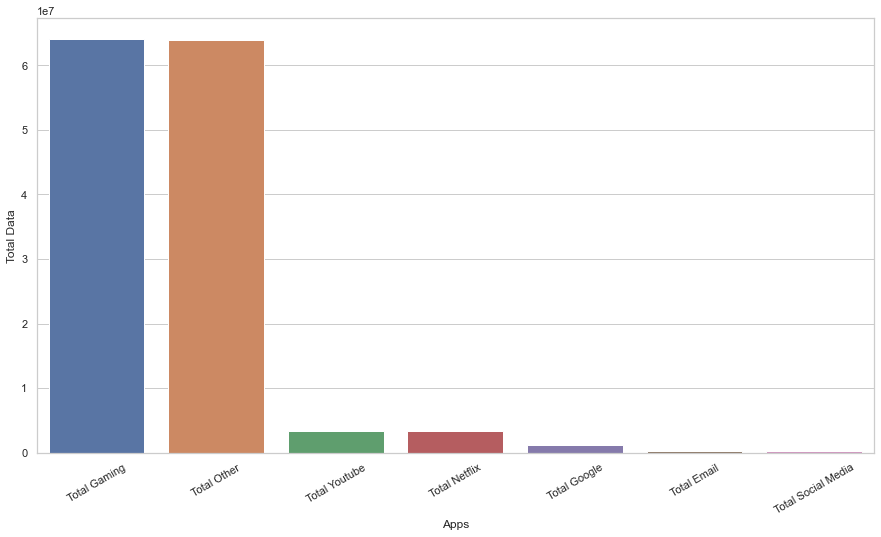

In [149]:
sns.set_theme(style="whitegrid")
# tips = sns.load_dataset("top_engaged_apps.csv")
plt.figure(figsize = (15,8))
ax = sns.barplot(x=df_application['Apps'], y=df_application["Total Data"], data=df_application, dodge=False)
a4_dims = (11.7, 8.27)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

Therefore the top three applications mostly user are Gaming, applications categorized as others, and Youtube in descending manner.

In [153]:
kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,"random_state": 42}
# A list holds the SSE values for each k
sse = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_for_kmeans)
    sse.append(kmeans.inertia_)

In [154]:
kl = KneeLocator(range(1, 20), sse, curve="convex", direction="decreasing")
kl.elbow

2

In [164]:
kmeans = KMeans(init="random",n_clusters=kl.elbow,n_init=10,max_iter=300,random_state=42)
label = kmeans.fit_predict(df_for_kmeans)
centroids = kmeans.cluster_centers_
labels = np.unique(label)


In [165]:
df_for_kmeans['cluster'] = label
df_for_kmeans.to_csv('../data/standard_engagement.csv')

In [166]:
df_for_kmeans.head()

,Total UL/DL,Dur. (ms),Session Frequency,cluster
0,1.000000,1.000000,1.000000,0
1,0.034694,0.281412,0.031809,0
2,0.033389,0.261988,0.027833,0
3,0.033330,0.524033,0.031809,0
4,0.031249,0.248213,0.033797,0
